In [5]:
import pandas as pd

# Load the CSV with everything as string first to prevent dtype issues
df = pd.read_csv('../data/Solar-Measurements_Togo-Dapaong_QC.csv', 
                 encoding='latin1', 
                 dtype=str, 
                 low_memory=False)

# Rename columns manually
df.columns = [
    'Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH',
    'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning',
    'Precipitation', 'TModA', 'TModB', 'GHIrsi', 'Comments'
]

# Strip whitespace and parse Timestamp with specified format
df['Timestamp'] = pd.to_datetime(df['Timestamp'].str.strip(), format="%Y-%m-%d %H:%M", errors='coerce')

# Preview the structure
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525601 entries, 0 to 525600
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525601 non-null  object        
 2   DNI            525601 non-null  object        
 3   DHI            525601 non-null  object        
 4   ModA           525601 non-null  object        
 5   ModB           525601 non-null  object        
 6   Tamb           525601 non-null  object        
 7   RH             525601 non-null  object        
 8   WS             525601 non-null  object        
 9   WSgust         525601 non-null  object        
 10  WSstdev        525601 non-null  object        
 11  WD             525601 non-null  object        
 12  WDstdev        525601 non-null  object        
 13  BP             525601 non-null  object        
 14  Cleaning       525601 non-null  object        
 15  

In [8]:
# List of columns to convert to numeric
numeric_columns = df.columns.drop(['Timestamp', 'Comments'])

# Convert them safely to numeric (invalid parsing will become NaN)
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check again to confirm changes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525601 entries, 0 to 525600
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  float64       
 14  Cleaning       525600 non-null  float64       
 15  

In [10]:
# Show number of missing values per column
df.isna().sum().sort_values(ascending=False)


Comments         525601
Timestamp             1
DNI                   1
GHI                   1
DHI                   1
ModA                  1
Tamb                  1
ModB                  1
WS                    1
WSgust                1
WSstdev               1
RH                    1
WD                    1
WDstdev               1
Cleaning              1
BP                    1
Precipitation         1
TModA                 1
TModB                 1
GHIrsi                1
dtype: int64

In [11]:
# Drop the completely empty 'Comments' column
df = df.drop(columns=['Comments'])

# Drop the row that contains missing values
df = df.dropna()

# Check again to make sure everything is clean
df.isna().sum()


Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
GHIrsi           0
dtype: int64

In [12]:
# Convert all columns (except 'Timestamp') to numeric
cols_to_convert = df.columns.drop('Timestamp')
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Check types again
df.dtypes


Timestamp        datetime64[ns]
GHI                     float64
DNI                     float64
DHI                     float64
ModA                    float64
ModB                    float64
Tamb                    float64
RH                      float64
WS                      float64
WSgust                  float64
WSstdev                 float64
WD                      float64
WDstdev                 float64
BP                      float64
Cleaning                float64
Precipitation           float64
TModA                   float64
TModB                   float64
GHIrsi                  float64
dtype: object

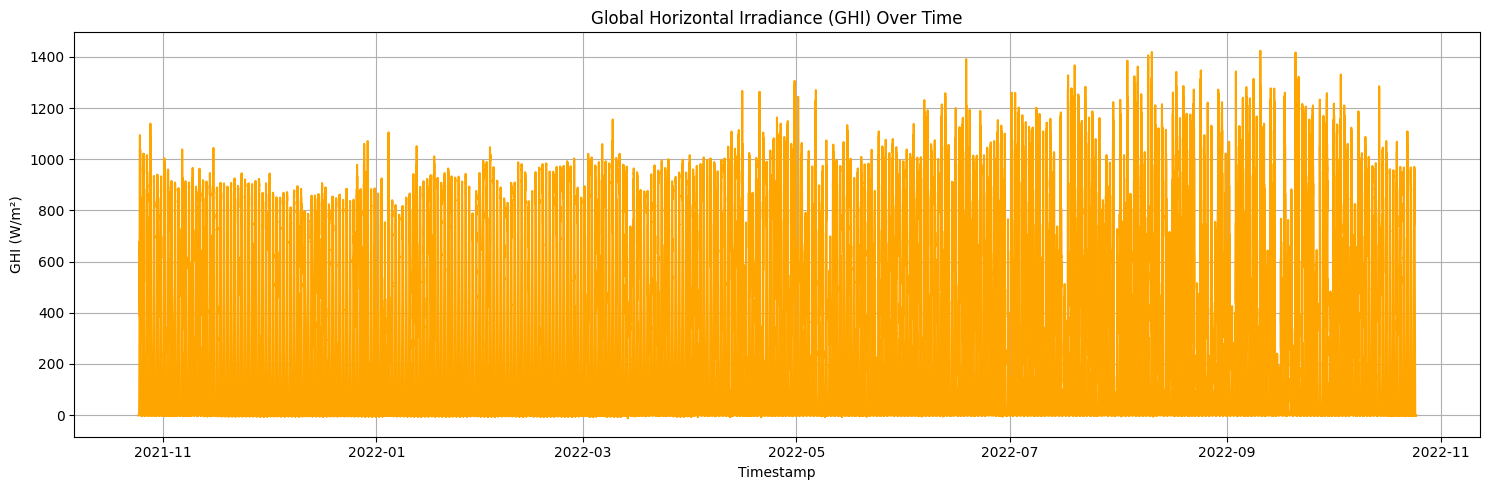

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(df['Timestamp'], df['GHI'], color='orange')
plt.xlabel('Timestamp')
plt.ylabel('GHI (W/m²)')
plt.title('Global Horizontal Irradiance (GHI) Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import zscore
import numpy as np

# Columns for outlier detection
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-scores
df_z = df[cols].apply(pd.to_numeric, errors='coerce')  # make sure numeric
z_scores = df_z.apply(zscore, nan_policy='omit')

# Flag outliers (abs(z) > 3)
outliers = (np.abs(z_scores) > 3)

# Count how many outliers in each column
outlier_counts = outliers.sum()
print("Outliers detected per column:")
print(outlier_counts)

# Optionally, show some rows flagged as outliers
print("\nSample outliers rows:")
print(df[outliers.any(axis=1)].head())

# Handling missing values for key columns: impute median
for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)




Outliers detected per column:
GHI        305
DNI       1062
DHI       3415
ModA       137
ModB       206
WS        3510
WSgust    3915
dtype: int64

Sample outliers rows:
               Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
4986 2021-10-28 11:06:00  1139.0  805.1  466.1  1172.0  1154.0  29.8  70.8   
5411 2021-10-28 18:11:00    -1.2    0.0    0.0     0.0     0.0  29.7  63.5   
5412 2021-10-28 18:12:00    -1.0    0.0    0.0     0.0     0.0  29.3  62.4   
5414 2021-10-28 18:14:00    -0.8    0.0    0.0     0.0     0.0  28.6  63.7   
5421 2021-10-28 18:21:00    -1.3    0.0    0.0     0.0     0.0  27.7  64.5   

       WS  WSgust  WSstdev     WD  WDstdev     BP  Cleaning  Precipitation  \
4986  2.2     2.6      0.4  298.6     13.4  977.0       0.0            0.0   
5411  6.6     9.7      1.6  122.1     14.3  976.0       0.0            0.0   
5412  6.9     8.9      1.2  128.7     10.8  976.0       0.0            0.0   
5414  7.1     8.9      1.1  127.9     14.4  976.

In [13]:
df.describe()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,GHIrsi
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,2022-04-25 12:00:30.000000768,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,227.765822
min,2021-10-25 00:01:00,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,0.000000
25%,2022-01-24 06:00:45,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,0.000000
50%,2022-04-25 12:00:30,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,2.500000
75%,2022-07-25 18:00:15,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,431.500000
max,2022-10-25 00:00:00,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,1424.800000
std,NaN,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,316.931191


In [9]:

df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,GHIrsi,Comments
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977.0,0.0,0.0,24.7,24.4,0.0,NaN
2,2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977.0,0.0,0.0,24.7,24.4,0.0,NaN
3,2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977.0,0.0,0.0,24.7,24.4,0.0,NaN
4,2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977.0,0.0,0.0,24.7,24.4,0.0,NaN


In [24]:
df.to_csv('../data/togo_clean.csv', index=False)


In [25]:
import pandas as pd

# Load the cleaned data if not already in memory
df_clean = pd.read_csv('../data/togo_clean.csv')

# Show basic statistics
df_clean.describe()


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,GHIrsi
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,227.765822
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,316.931191
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,0.000000
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,0.000000
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,2.500000
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,431.500000
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,1424.800000


In [23]:
import os

print(os.getcwd())  # shows current working directory
print(os.listdir()) # lists files/folders here


c:\Users\aweso\solar-challenge-week1\notebooks
['.ipynb_checkpoints', 'togo_eda.ipynb']


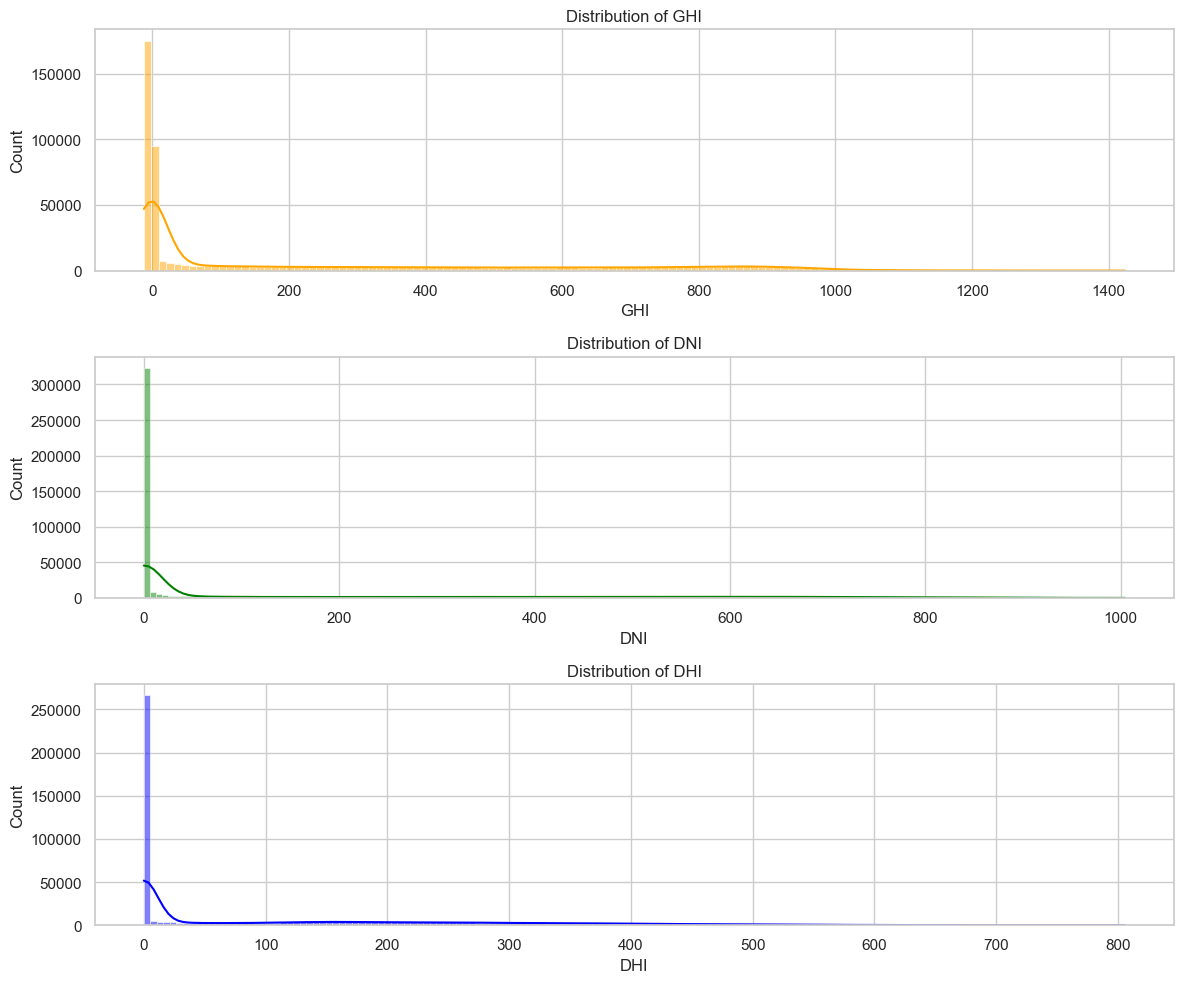

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot distribution of GHI, DNI, DHI
fig, axs = plt.subplots(3, 1, figsize=(12, 10))
sns.histplot(df_clean['GHI'], kde=True, ax=axs[0], color='orange')
axs[0].set_title('Distribution of GHI')

sns.histplot(df_clean['DNI'], kde=True, ax=axs[1], color='green')
axs[1].set_title('Distribution of DNI')

sns.histplot(df_clean['DHI'], kde=True, ax=axs[2], color='blue')
axs[2].set_title('Distribution of DHI')

plt.tight_layout()
plt.show()


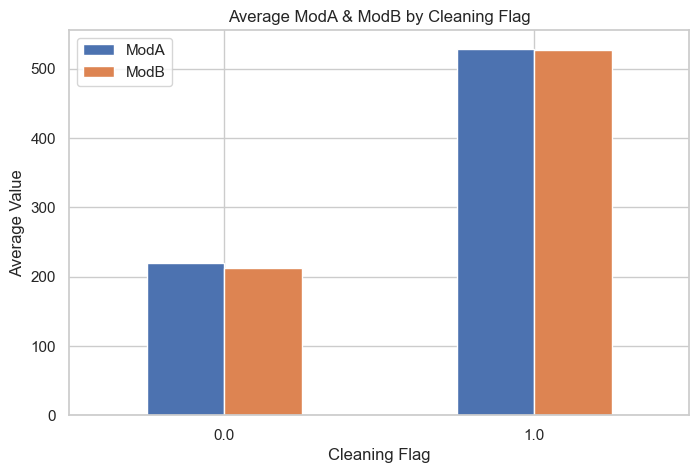

In [36]:
import matplotlib.pyplot as plt

# Group by Cleaning flag and calculate average ModA & ModB
cleaning_avg = df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean()

cleaning_avg.plot(kind='bar', figsize=(8,5))
plt.title('Average ModA & ModB by Cleaning Flag')
plt.ylabel('Average Value')
plt.xlabel('Cleaning Flag')
plt.xticks(rotation=0)
plt.show()


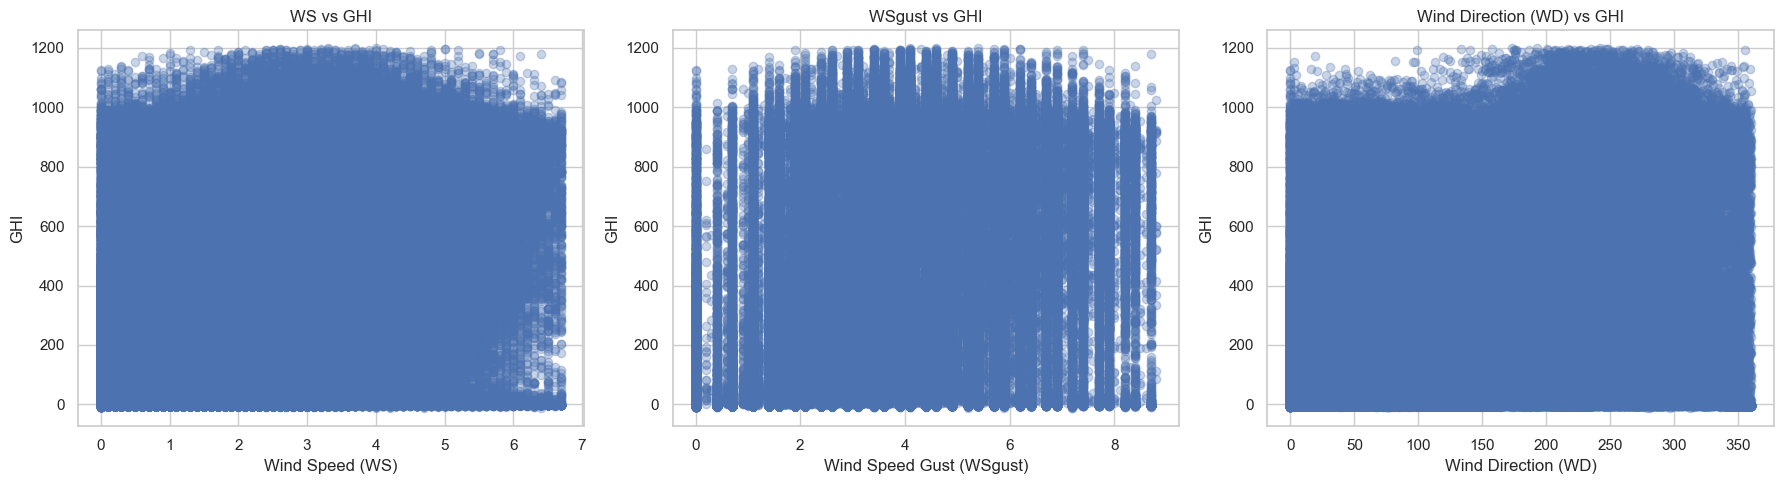

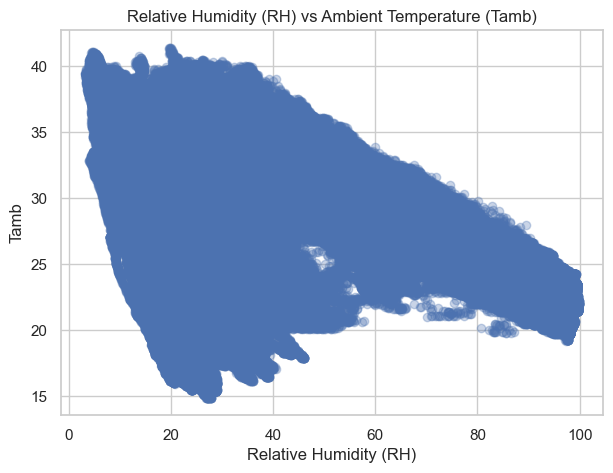

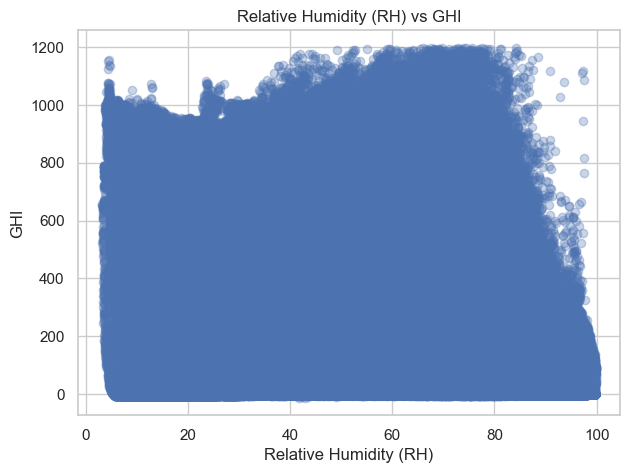

In [37]:
fig, axs = plt.subplots(1, 3, figsize=(18,5))

axs[0].scatter(df_clean['WS'], df_clean['GHI'], alpha=0.3)
axs[0].set_title('WS vs GHI')
axs[0].set_xlabel('Wind Speed (WS)')
axs[0].set_ylabel('GHI')

axs[1].scatter(df_clean['WSgust'], df_clean['GHI'], alpha=0.3)
axs[1].set_title('WSgust vs GHI')
axs[1].set_xlabel('Wind Speed Gust (WSgust)')
axs[1].set_ylabel('GHI')

axs[2].scatter(df_clean['WD'], df_clean['GHI'], alpha=0.3)
axs[2].set_title('Wind Direction (WD) vs GHI')
axs[2].set_xlabel('Wind Direction (WD)')
axs[2].set_ylabel('GHI')

plt.tight_layout()
plt.show()

# RH vs Tamb
plt.figure(figsize=(7,5))
plt.scatter(df_clean['RH'], df_clean['Tamb'], alpha=0.3)
plt.title('Relative Humidity (RH) vs Ambient Temperature (Tamb)')
plt.xlabel('Relative Humidity (RH)')
plt.ylabel('Tamb')
plt.show()

# RH vs GHI
plt.figure(figsize=(7,5))
plt.scatter(df_clean['RH'], df_clean['GHI'], alpha=0.3)
plt.title('Relative Humidity (RH) vs GHI')
plt.xlabel('Relative Humidity (RH)')
plt.ylabel('GHI')
plt.show()


<Figure size 800x800 with 0 Axes>

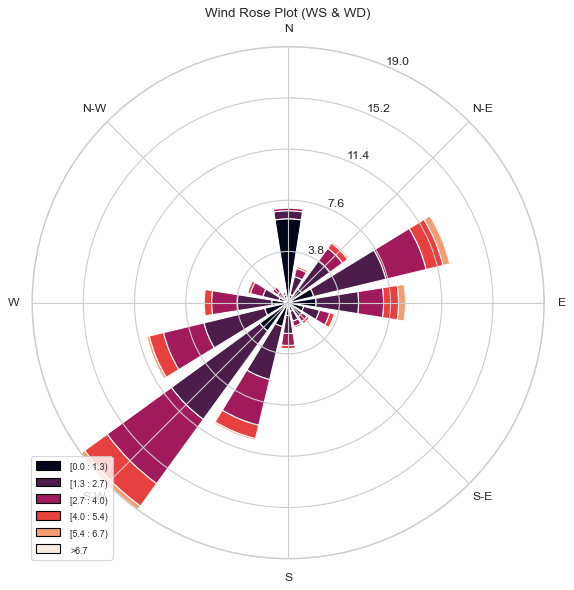

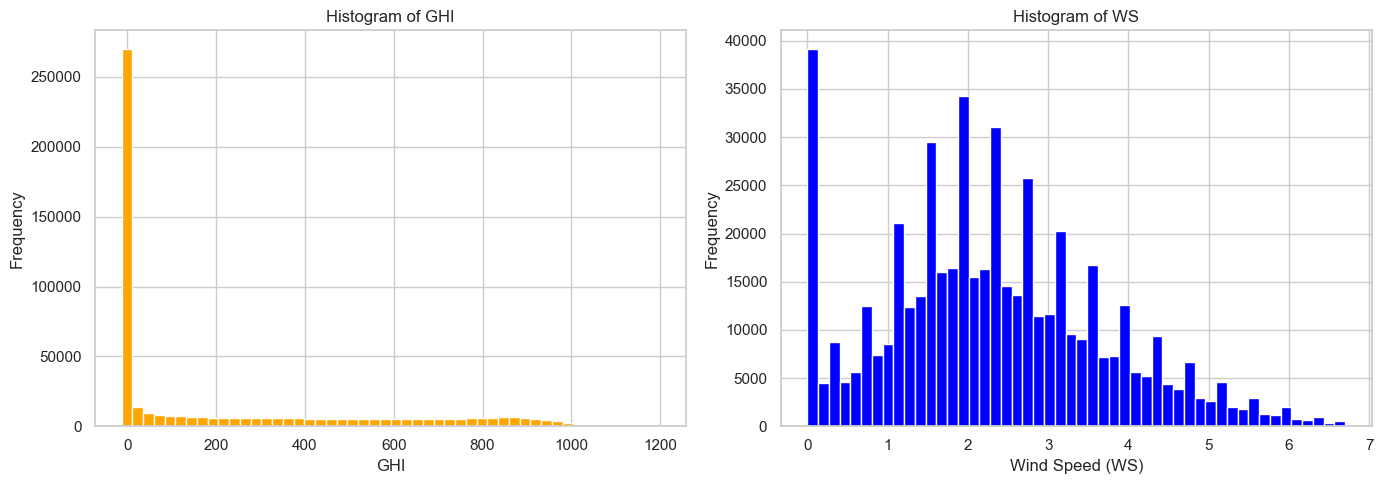

In [41]:
# Wind rose using windrose library (install if needed: !pip install windrose)
from windrose import WindroseAxes
import numpy as np

plt.figure(figsize=(8,8))
ax = WindroseAxes.from_ax()
ax.bar(df_clean['WD'], df_clean['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Wind Rose Plot (WS & WD)')
plt.show()

# Histograms for GHI and WS
fig, axs = plt.subplots(1, 2, figsize=(14,5))

axs[0].hist(df_clean['GHI'], bins=50, color='orange')
axs[0].set_title('Histogram of GHI')
axs[0].set_xlabel('GHI')
axs[0].set_ylabel('Frequency')

axs[1].hist(df_clean['WS'], bins=50, color='blue')
axs[1].set_title('Histogram of WS')
axs[1].set_xlabel('Wind Speed (WS)')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


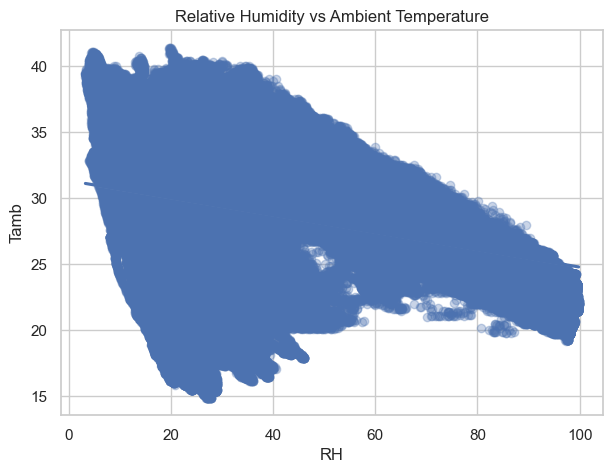

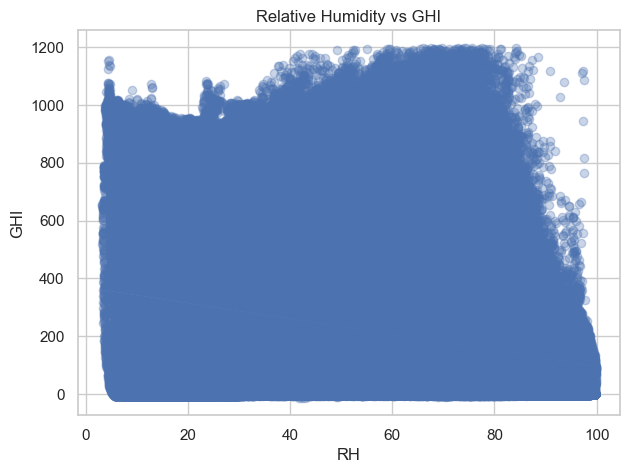

In [42]:
import seaborn as sns

plt.figure(figsize=(7,5))
sns.regplot(x='RH', y='Tamb', data=df_clean, scatter_kws={'alpha':0.3})
plt.title('Relative Humidity vs Ambient Temperature')
plt.show()

plt.figure(figsize=(7,5))
sns.regplot(x='RH', y='GHI', data=df_clean, scatter_kws={'alpha':0.3})
plt.title('Relative Humidity vs GHI')
plt.show()


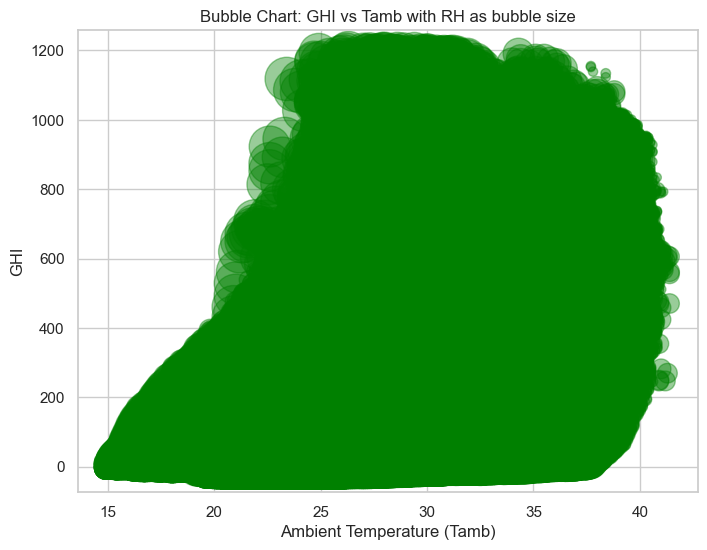

In [43]:
plt.figure(figsize=(8,6))
plt.scatter(df_clean['Tamb'], df_clean['GHI'], s=df_clean['RH']*10, alpha=0.4, c='green')
plt.xlabel('Ambient Temperature (Tamb)')
plt.ylabel('GHI')
plt.title('Bubble Chart: GHI vs Tamb with RH as bubble size')
plt.show()


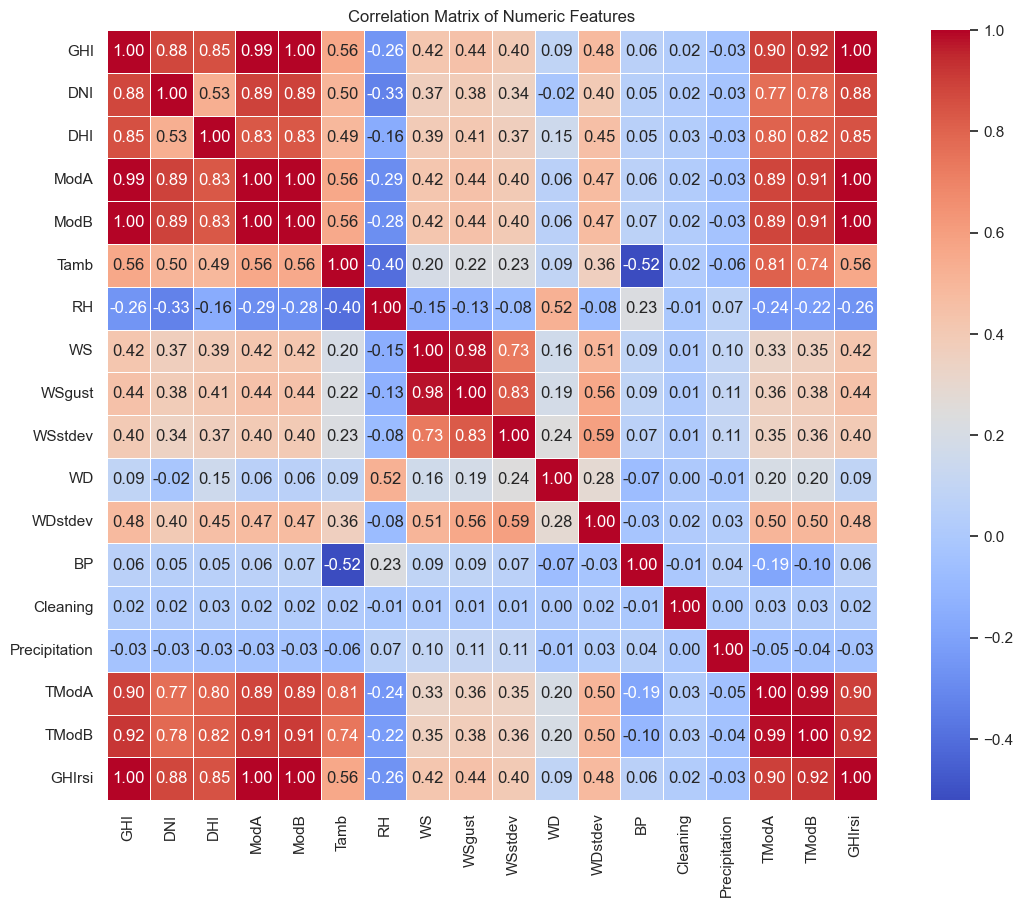

In [30]:
# Compute correlation only on numeric columns
numeric_df = df_clean.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


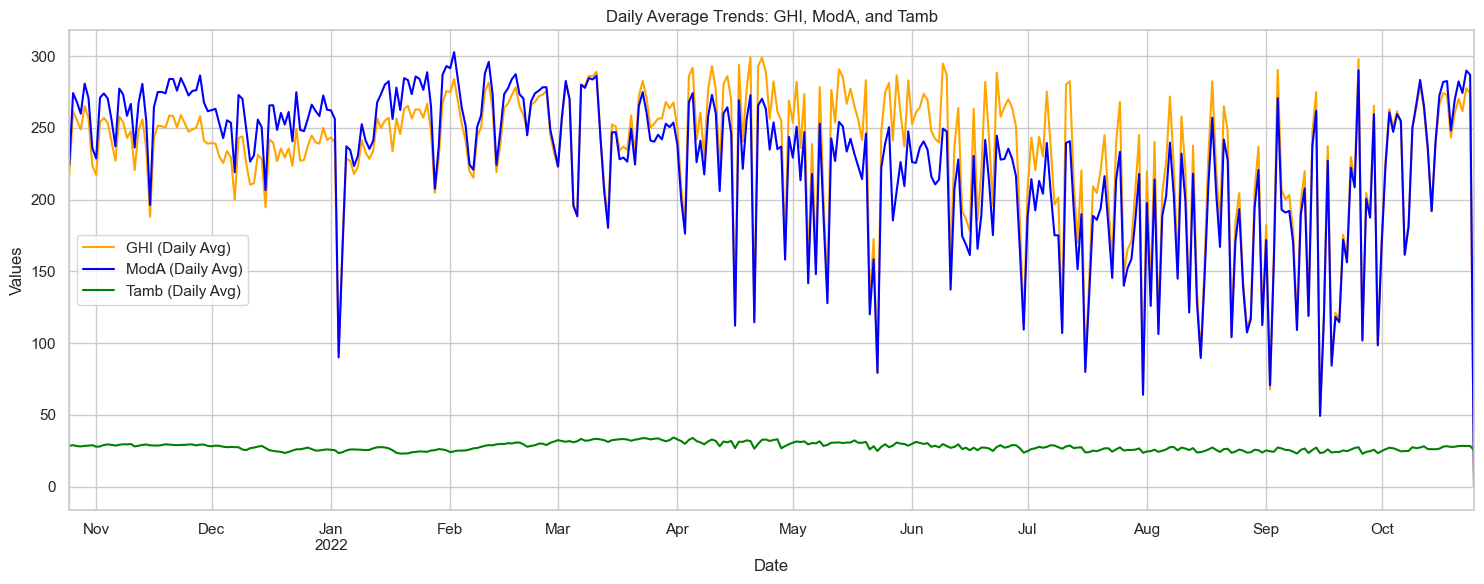

In [33]:
# First, make sure the timestamp column is in datetime format
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])

# Set the timestamp as index
df_clean.set_index('Timestamp', inplace=True)

# Plot a few key metrics over time
plt.figure(figsize=(15, 6))
df_clean['GHI'].resample('D').mean().plot(label='GHI (Daily Avg)', color='orange')
df_clean['ModA'].resample('D').mean().plot(label='ModA (Daily Avg)', color='blue')
df_clean['Tamb'].resample('D').mean().plot(label='Tamb (Daily Avg)', color='green')

plt.title("Daily Average Trends: GHI, ModA, and Tamb")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()
plt.tight_layout()
plt.show()
